<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
#from phik import resources
#from phik.binning import bin_data
from phik.report import plot_correlation_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/datasets/insurance.csv')

In [4]:
def data_stats(data):
    """
    В функцию передается исследуемый датафрейм.
    Функция выводит на экран основную информацию, 
    необходимую для первичного анализа датафрейма. 
    """
    display(data.info())
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(data.describe().T)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(data.isna().sum())
    interval_cols = ['Зарплата', 'Возраст']
    phik_overview = data.phik_matrix(interval_cols=interval_cols)
    plot_correlation_matrix(phik_overview.values, 
                            x_labels=phik_overview.columns, 
                            y_labels=phik_overview.index, 
                            vmin=0, vmax=1, color_map="Greens", 
                            title=r"correlation $\phi_K$", 
                            fontsize_factor=1.5, 
                            figsize=(10, 8))
    plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

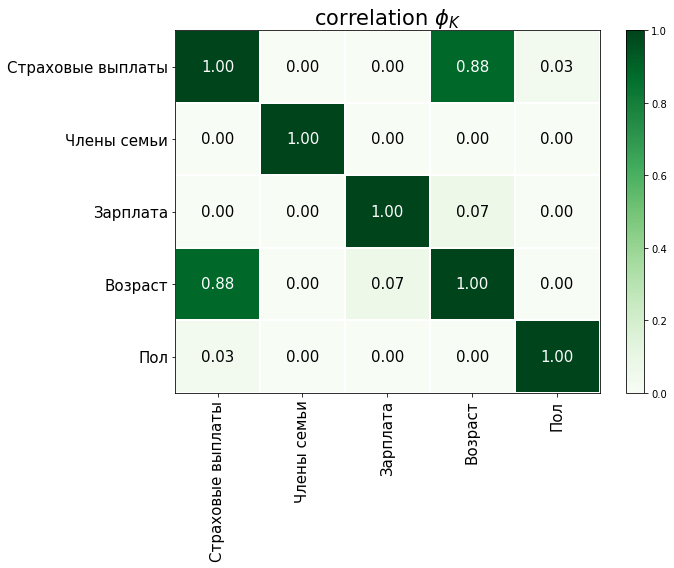

In [5]:
data_stats(data)

In [6]:
# Переименуем столбцы
data = data.rename(columns=
               {'Пол': 'male',
                'Возраст': 'age',
                'Зарплата': 'salary',
                'Члены семьи': 'family_members',
                'Страховые выплаты': 'insurance_payments'
               }
              )

In [7]:
# Изменим тип данных
data['age'] = data['age'].astype(int)

В данных отсутствуют пропуски. 

Можем отметить наличик средней прямой связи между возрастом и страховыми выплатами. 

Дополнительную предобработку данных в рамках решаемой задачи не осуществляем, так как заказчику необходимо решение проблемы преобразования данных, в результате которого было бы сложно восстановить персональную информацию. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится.

**Обоснование:** 
Пусть

$
X^{'} = XP
$

где P - случайно сгенерированная обратимая матрица

тогда

$
a{'} = X^{'}w^{'}
$

$
w{'} =((X^{'})^T X^{'})^{-1} (X^{'})^T y
$

Проведем преобразования, подставив выражение Х (XP) в формулу $w{'}$:

$
w{'} = ((XP)^T XP)^{-1} (XP)^T y
$

Проведем преобразования, используя свойства перемножения матриц:

$
w{'} = (P^TX^TXP)^{-1}*P^T* X^T * y
$
        
$
w{'} = ([P^TX^TX]*P)^{-1}*P^T* X^T * y
$
        
$
w{'} =  P^{-1}*[P^T(X^T*X)]^{-1}*P^T* X^T * y
$
        
$
w{'} = P^{-1}*[X^T*X]^{-1}*[P^T]^{-1}*P^T* X^T * y
$
    
$
w{'} = P^{-1}*[X^T*X]^{-1}*E* X^T * y
$
    
$
w{'} = P^{-1}*w
$
    
$
a{'} = XP*P^{-1}*w
$
    
$
a{'} = X*E*w = Xw
$

Таким образом 

$a{'} = X^{'}w^{'} = XP(P^TP)^{-1}P^Tw = XEw = Xw = a$;

$w{'} = (P^TP)^{-1}P^Tw$

## Алгоритм преобразования

**Алгоритм**

Для защиты данных клиентов предлагаем умножить объясняемые признаки на случайно сгенерированную обратимую матрицу. Это позволит закодировать персональные данные клиентов, существенно усложнив возможность их восстановления. Данный метод является корректным, так как при этом качество модели не изменяется.

Этапы преобразования данных:
 - Задаем определяющие признаки.
 - Генерируем случайную матрицу, с помощью которой произведем преобразование данных. Количество строк такой матрицы должно соответствовать количеству столбцов матрицы определяющих признаков.
 - Проверяем сгенерированную матрицу на обратимость. Если матрица обратима, переходим к следующему шагу. Если матрица необратима, возвращаемся к предыдущему пункту.
 - Осуществляем умножением матрицы определяющих признаков на сгенерированную матрицу. 
 - Обучаем модель, строим прогноз.

**Обоснование**

В процессе построения предсказания задача модели линейной регрессии сводится к минимизации среднего квадратического отклонения по аргументу `w`. При этом $w = (X^T X)^{-1} X^T y$. 

При осуществлении преобразований в соответствии со свойствами умножения матриц мы выяснили, что умножение признаков на обратимую матрицу не изменят качество модели линейной регрессии.

## Проверка алгоритма

In [8]:
# Задаем определяющие (features) и определяемые (target) признаки
features = data.drop('insurance_payments', axis=1)
target = data['insurance_payments']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=442) 

In [9]:
# Определяем модель
model = LinearRegression()
# Обучаем модель
model.fit(features_train, target_train)
# Строим предсказания
predictions = model.predict(features_test)
# Оцениваем качество модели
result = r2_score(target_test, predictions)
print(f'R2 модели логистической регрессии равна {result:.5}.') 

R2 модели логистической регрессии равна 0.42578.


In [10]:
# Генерируем случайную матрицу
cod_matrix = np.random.randint(0, 100, (len(features_train.columns), len(features_train.columns)))
while np.linalg.det(cod_matrix) == 0:
    cod_matrix = np.random.randint(0, 100, (len(features_train.columns), len(features_train.columns)))
# В нашем случае она квадратная, но количество столбцов можно и увеличить при желании. 
# Это увеличит время обучения модели, но не снизит качество.
# Если количество столбцов будет меньше, качество снизится.

In [11]:
# Определяем закодированные признаки
features_new = features.dot(cod_matrix)
features_train_new, features_test_new, target_train, target_test = train_test_split(
features_new, target, test_size=0.25, random_state=442)

In [12]:
# Обучаем модель
model.fit(features_train_new, target_train)
# Строим предсказания
predictions_new = model.predict(features_test_new)
# Оцениваем качество модели
result_new = r2_score(target_test, predictions_new)
print(f'R2 модели логистической регрессии равна {result_new:.5}.') 

R2 модели логистической регрессии равна 0.42578.


In [13]:
# Провести расшифровку данных можно с помощью следующего кода:
# Умножаем закодированные данные на матрицу, 
# обратную сгенерированной случайно для кодирования
features_decoder = features_new.dot(np.linalg.inv(cod_matrix))
# Округляем значения до целочисленных:
features_decoder[0] = features_decoder[0].round().astype(int)
features_decoder[3] = features_decoder[3].round().astype(int)

Предложенный нами метод преобразования данных позволяет защитить персональные данные клиентов, не оказывая влияния на качество модели линейной регрессии.

В рамках проекта перед нами стояла задача по защите данных клиентов страховой компании «Хоть потоп» путем разработки такого метода преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

На первом этапе мы загрузили данные и провели их предварительную обработку. 

На втором этапе доказали, что умножение признаков на обратимую матрицу не изменит качества модели линейной регрессии. Будем использовать это свойство для решения поставленной задачи.

На третьем этапе написали алгоритм преобразования данных, который поможет защитить персональные данные клиентов.

На четвертом этапе проверили корректность работы предлагаемого алгоритма. Обучили модель линейной регрессии на исходных данных, а затем на преобразованных. Сравнив резульатты, убедились, что качество модели не изменилось.


Таким образом, нами была выполнена поставленная задача, а именно разработан такой метод преобразования данных, после применения которого было бы сложно восстановить персональную информацию.